<a href="https://colab.research.google.com/github/stevengregori92/Learn-TimeSeriesForecast/blob/main/ARIMA_for_House_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Package

In [ ]:
!pip install pmdarima
!pip install -q kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00


#Import Dataset

In [ ]:
# Import kaggle API
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d htagholdings/property-sales
!unzip property-sales.zip
!rm property-sales.zip

  0% 0.00/162k [00:00<?, ?B/s]
100% 162k/162k [00:00<00:00, 114MB/s]
Archive:  property-sales.zip
  inflating: ma_lga_12345.csv        
  inflating: raw_sales.csv           


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

<Axes: xlabel='datesold'>

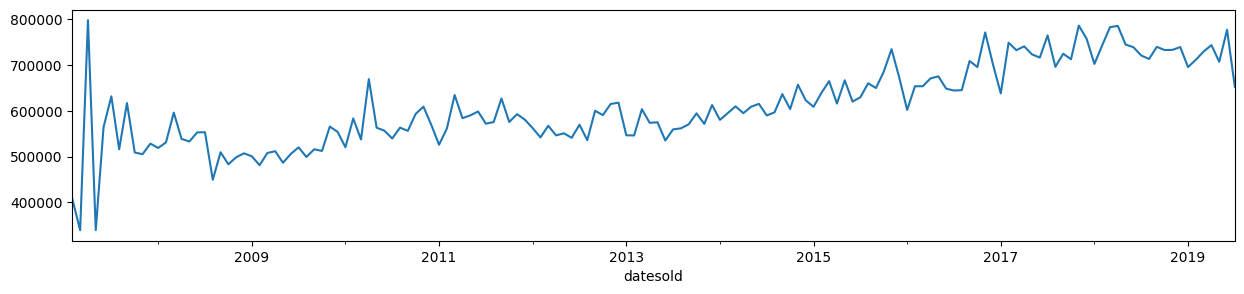

In [ ]:
df = pd.read_csv('raw_sales.csv', index_col='datesold', parse_dates=['datesold'])
df = df[df['propertyType'] != 'unit']
df = df.resample('M').mean(numeric_only=True)
series = df.price
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

###Training

In [ ]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion='aicc', trace=True, suppress_warning=True, random_state=42)

Performing stepwise search to minimize aicc
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AICC=inf, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AICC=3139.063, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AICC=3081.867, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AICC=3176.966, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AICC=3137.139, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AICC=3084.737, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AICC=3083.610, Time=0.47 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AICC=3082.470, Time=0.23 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AICC=3082.240, Time=0.09 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AICC=3084.434, Time=0.46 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AICC=3140.532, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AICC=3151.986, Time=0.18 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AICC=3151.407, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AICC=3178.801, Time=0.10 sec
 ARIMA(2,

##Forecast

In [ ]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_forecast)

dates = pd.date_range(X_train.index[-1], periods=n_forecast, freq='M')
pred = pd.Series(pred, index=dates)

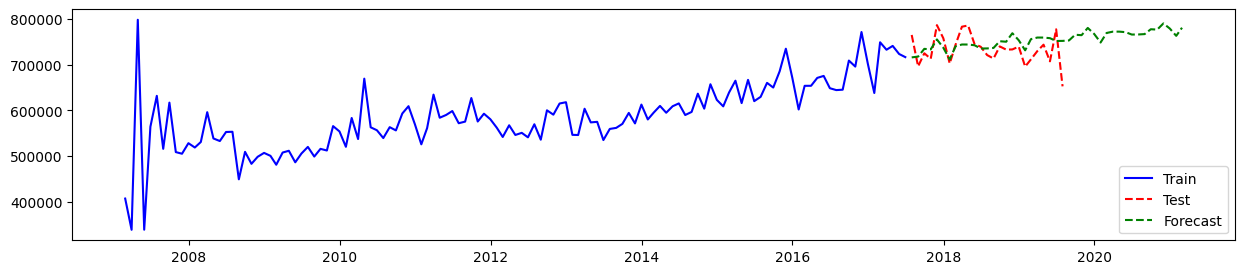

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r--', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()